In [23]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import splitfolders
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [11]:
%cd /content 

! rps-test-set.zip; unzip rps-test-set.zip; rm rps-test-set.zip

/content
/bin/bash: rps-test-set.zip: command not found
Archive:  rps-test-set.zip
   creating: rps-test-set/paper/
  inflating: rps-test-set/paper/testpaper01-00.png  
  inflating: rps-test-set/paper/testpaper01-01.png  
  inflating: rps-test-set/paper/testpaper01-02.png  
  inflating: rps-test-set/paper/testpaper01-03.png  
  inflating: rps-test-set/paper/testpaper01-04.png  
  inflating: rps-test-set/paper/testpaper01-05.png  
  inflating: rps-test-set/paper/testpaper01-06.png  
  inflating: rps-test-set/paper/testpaper01-07.png  
  inflating: rps-test-set/paper/testpaper01-08.png  
  inflating: rps-test-set/paper/testpaper01-09.png  
  inflating: rps-test-set/paper/testpaper01-10.png  
  inflating: rps-test-set/paper/testpaper01-11.png  
  inflating: rps-test-set/paper/testpaper01-12.png  
  inflating: rps-test-set/paper/testpaper01-13.png  
  inflating: rps-test-set/paper/testpaper01-14.png  
  inflating: rps-test-set/paper/testpaper01-15.png  
  inflating: rps-test-set/paper/test

In [22]:
%cd /content 
!curl -L "https://drive.google.com/file/d/1uBPHSBJ4sGDGD-SRRgdaoh0JRG1MWvbh/view?usp=share_link"

/content
<!doctype html><html lang="en-US" dir="ltr"><head><base href="https://accounts.google.com/v3/signin/"><meta name="referrer" content="origin"><meta name="viewport" content="width=device-width, initial-scale=1"><style data-href="https://www.gstatic.com/_/mss/boq-identity/_/ss/k=boq-identity.AccountsSignInUi.tUAjdEHrNNA.L.W.O/am=DCMAUAACAFAgAAAAAAAAAAACgEQI/d=1/ed=1/rs=AOaEmlGqM7BqpbvEIc7pIkrPUIMzPOoJHw/m=identifierview,_b,_tp,_r" nonce="KD1O0Z5RVHEBUAb4xOcgsA">c-wiz{contain:style}c-wiz>c-data{display:none}c-wiz.rETSD{contain:none}c-wiz.Ubi8Z{contain:layout style}.JnOM6e{background-color:transparent;border:none;-webkit-border-radius:4px;border-radius:4px;-webkit-box-sizing:border-box;box-sizing:border-box;display:inline-block;font-size:14px;height:36px;letter-spacing:.15px;line-height:34px;padding:0 24px;position:relative;text-align:center}.JnOM6e:focus-visible{outline:none;position:relative}.JnOM6e:focus-visible::after{border:2px solid #185abc;border-radius:6px;bottom:-4px;box-s

In [26]:
%cd /content 
!rps.zip; unzip rps.zip;

/content
/bin/bash: rps.zip: command not found
Archive:  rps.zip
   creating: rps/paper/
  inflating: rps/paper/paper01-000.png  
  inflating: rps/paper/paper01-001.png  
  inflating: rps/paper/paper01-002.png  
  inflating: rps/paper/paper01-003.png  
  inflating: rps/paper/paper01-004.png  
  inflating: rps/paper/paper01-005.png  
  inflating: rps/paper/paper01-006.png  
  inflating: rps/paper/paper01-007.png  
  inflating: rps/paper/paper01-008.png  
  inflating: rps/paper/paper01-009.png  
  inflating: rps/paper/paper01-010.png  
  inflating: rps/paper/paper01-011.png  
  inflating: rps/paper/paper01-012.png  
  inflating: rps/paper/paper01-013.png  
  inflating: rps/paper/paper01-014.png  
  inflating: rps/paper/paper01-015.png  
  inflating: rps/paper/paper01-016.png  
  inflating: rps/paper/paper01-017.png  
  inflating: rps/paper/paper01-018.png  
  inflating: rps/paper/paper01-019.png  
  inflating: rps/paper/paper01-020.png  
  inflating: rps/paper/paper01-021.png  
  inflati

In [27]:
input_folder="/content/rps"
output_folder= "/content/processdata"
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(.8, .2))

Copying files: 2520 files [00:00, 4983.30 files/s]


In [28]:
height, width= (224,224)
batchsize= 32

train_dir= r"/content/processdata/train"
val_dir= r"/content/processdata/val"
test_dir= r"/content/rps-test-set"


train_datagen= ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

train_generator= train_datagen.flow_from_directory(
        train_dir,
        target_size=(height, width),
        batch_size=batchsize,
        class_mode='categorical',
        subset= "training"
)

val_generator= train_datagen.flow_from_directory(
        val_dir,
        target_size=(height, width),
        batch_size=batchsize,
        class_mode='categorical',
        subset= "training"
)

test_generator= train_datagen.flow_from_directory(
        test_dir,
        target_size=(height, width),
        batch_size=1,
        class_mode='categorical',
        subset= "training"
)



Found 1212 images belonging to 3 classes.
Found 303 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [29]:
from tensorflow.python import metrics
base_model= ResNet50(include_top=False, weights="imagenet")
output= base_model.output
avgpoollayer= keras.layers.GlobalAveragePooling2D()(output)
denselayer= keras.layers.Dense(1024, activation='relu')(avgpoollayer)
predictions= keras.layers.Dense(train_generator.num_classes, activation="softmax")(denselayer)
model= keras.models.Model(inputs=base_model.input, outputs= predictions)

for layer in base_model.layers:
  layer.trainable= False

optimizer= keras.optimizers.Adam()
loss= keras.losses.CategoricalCrossentropy()

model.compile(optimizer= optimizer, loss= loss, metrics=['accuracy'])

model.fit(train_generator, epochs=1, validation_data=val_generator)

38/38 [==============================] - 31s 553ms/step - loss: 0.6258 - accuracy: 0.8531 - val_loss: 0.0397 - val_accuracy: 0.9868


In [30]:
model.evaluate(test_generator)

225/225 [==============================] - 5s 18ms/step - loss: 0.4902 - accuracy: 0.8267


[0.4902413487434387, 0.8266666531562805]

In [66]:
Data_classes= train_generator.class_indices
Data_classes
classes= ["paper", "Rock", "Scissors"]

1/1 [==============================] - 0s 21ms/step
Prediction: Rock


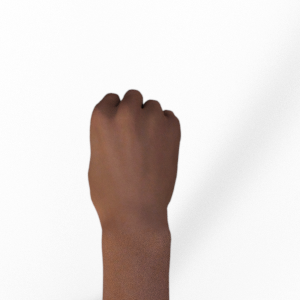

In [77]:
image_1= cv.imread("/content/rps-test-set/rock/testrock02-04.png")
image_1_resized= cv.resize(image_1, (224,224))
input_1= preprocess_input(image_1_resized * 255)
y_proba= model.predict(input_1[None, ...])
y_class= y_proba.argmax(axis=-1)
print(f"Prediction: {classes[y_class[0]]}")
cv2_imshow(image_1)

1/1 [==============================] - 0s 23ms/step
Prediction: paper


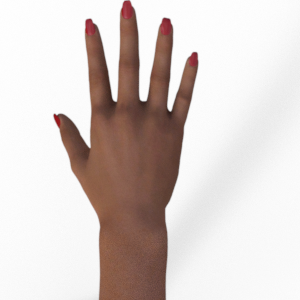

In [76]:

image_1= cv.imread("/content/rps-test-set/paper/testpaper02-09.png")
image_1_resized= cv.resize(image_1, (224,224))
input_1= preprocess_input(image_1_resized * 255)
y_proba= model.predict(input_1[None, ...])
y_class= y_proba.argmax(axis=-1)
print(f"Prediction: {classes[y_class[0]]}")
cv2_imshow(image_1)

1/1 [==============================] - 0s 21ms/step
Prediction: Scissors


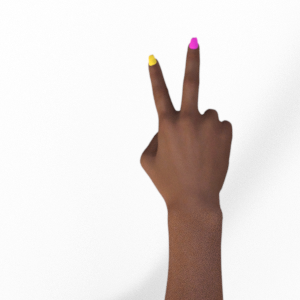

In [75]:
image_1= cv.imread("/content/rps-test-set/scissors/testscissors02-27.png")
image_1_resized= cv.resize(image_1, (224,224))
input_1= preprocess_input(image_1_resized * 255)
y_proba= model.predict(input_1[None, ...])
y_class= y_proba.argmax(axis=-1)
print(f"Prediction: {classes[y_class[0]]}")
cv2_imshow(image_1)